In [2]:
! unzip data

Archive:  data.zip
  inflating: Shoe vs Sandal vs Boot Dataset/Boot/boot (1).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Boot/boot (10).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Boot/boot (100).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Boot/boot (1000).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Boot/boot (1001).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Boot/boot (1002).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Boot/boot (1003).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Boot/boot (1004).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Boot/boot (1005).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Boot/boot (1006).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Boot/boot (1007).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Boot/boot (1008).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Boot/boot (1009).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Boot/boot (101).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Boot/b

Because of the problems in net and filtering, I couldn't download dataset from Kaggle directly by commands, so I uploaded dataset in my directory and renamed it to data.zip and then unzipped it.

# part a

In [4]:
import numpy as np
import torch
import matplotlib.pyplot as plt

import os
import cv2

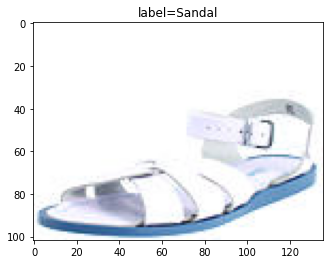

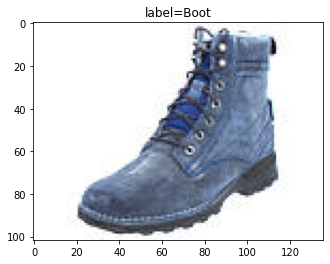

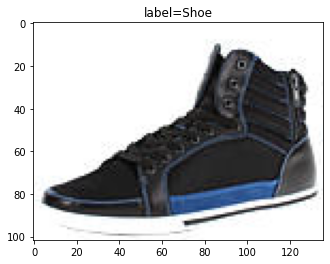

In [ ]:
for image_class in os.listdir('Shoe vs Sandal vs Boot Dataset/'):
    for image in os.listdir(os.path.join('Shoe vs Sandal vs Boot Dataset/',image_class)):
        image_path = os.path.join('Shoe vs Sandal vs Boot Dataset/',image_class,image)
        img = cv2.imread(image_path)
        plt.title(f'label={image_class}')
        plt.imshow(img)
        plt.show()
        
        break


In [ ]:
import pandas as pd
new = ({
    'image':[0],
    'label' :[0]
               })
df = pd.DataFrame(new)
df=df.drop(0)

for image_class in os.listdir('Shoe vs Sandal vs Boot Dataset/'):
    for image in os.listdir(os.path.join('Shoe vs Sandal vs Boot Dataset/',image_class)):
        image_path = os.path.join('Shoe vs Sandal vs Boot Dataset/',image_class,image)
        img = cv2.imread(image_path)
       
        if img.shape[1]!=135:
          new_row = {'image':img , 'label': image_class}
          df = df.append(new_row, ignore_index=True)
        

In [6]:
mapping={'Sandal':[1,0,0],'Shoe':[0,1,0],'Boot':[0,0,1]}

df['label'] = df['label'].map(mapping)
traindataset=df.sample(frac=0.7,random_state=42)
testdataset=df.drop(traindataset.index)
print(traindataset.head)

<bound method NDFrame.head of                                                    image      label
13412  [[[255, 255, 255], [255, 255, 255], [255, 255,...  [0, 1, 0]
6472   [[[255, 255, 255], [255, 255, 255], [255, 255,...  [1, 0, 0]
9967   [[[255, 255, 255], [255, 255, 255], [255, 255,...  [1, 0, 0]
862    [[[255, 255, 255], [255, 255, 255], [255, 255,...  [0, 0, 1]
5967   [[[255, 255, 255], [255, 255, 255], [255, 255,...  [1, 0, 0]
...                                                  ...        ...
7997   [[[255, 255, 255], [255, 255, 255], [255, 255,...  [1, 0, 0]
4276   [[[255, 255, 255], [255, 255, 255], [255, 255,...  [0, 0, 1]
14621  [[[255, 255, 255], [255, 255, 255], [255, 255,...  [0, 1, 0]
10633  [[[255, 255, 255], [255, 255, 255], [255, 255,...  [0, 1, 0]
14397  [[[255, 255, 255], [255, 255, 255], [255, 255,...  [0, 1, 0]

[10499 rows x 2 columns]>


# part b

In [ ]:
from torch.utils.data import Dataset
from torchvision import datasets
class CustomDataset(Dataset):
    def __init__(self, data, transform=None, target_transform=None):
        self.transform = transform
        self.target_transform = target_transform
        self.xtensor = torch.tensor([x for x in  data['image']])
        self.ytensor = torch.tensor([x for x in  data['label']])
       
    def __len__(self):
        return self.ytensor.shape[0]

    def __getitem__(self, idx):

        self.X = self.xtensor[idx,:]
        self.y = self.ytensor[idx,:]
        return self.X, self.y

training = CustomDataset(traindataset)
testing = CustomDataset(testdataset)

In [44]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training, batch_size=32, shuffle=True)
test_dataloader = DataLoader(testing, batch_size=32, shuffle=True)

In [45]:
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten(1,3)
        self.linear1 = nn.Linear(41616, 1000)
        self.relu1 = nn.ReLU()
        self.linear2 = nn.Linear(1000, 500)
        self.linear3 = nn.Linear(500, 200)
        self.linear4 = nn.Linear(200, 50)
        self.linear5 = nn.Linear(50, 3)
        self.dropout=nn.Dropout(0.4)

    def forward(self, x):
        x = self.flatten(x)
        x = self.linear1(x)
        x = self.relu1(x)
        x = self.linear2(x)
        x = self.relu1(x)
        x = self.linear3(x)
        x = self.relu1(x)
        x = self.linear4(x)
        x = self.relu1(x)
        logits = self.linear5(x)
        return logits

In [46]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

model1 = MLP().to(device)



Using cuda device


In [47]:
model1.train()
learning_rate = 1e-3
batch_size = 32
epochs = 20
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model1.parameters(), lr=learning_rate)


In [18]:
!pip install tensorboard

     ---------------------------------------- 6.0/6.0 MB 4.9 MB/s eta 0:00:00
     -------------------------------------- 177.8/177.8 kB 3.6 MB/s eta 0:00:00
     -------------------------------------- 904.2/904.2 kB 5.2 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 5.7 MB/s eta 0:00:00
     -------------------------------------- 781.3/781.3 kB 4.5 MB/s eta 0:00:00
     -------------------------------------- 124.6/124.6 kB 2.4 MB/s eta 0:00:00
     -------------------------------------- 151.7/151.7 kB 3.0 MB/s eta 0:00:00


In [49]:
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()

In [50]:
def train_loop(dataloader, model, loss_fn, optimizer,epoch):
    size = len(dataloader.dataset)
    tloss = 0
    correct = 0
    nbatch = len(dataloader)
    for batch, (X, y) in enumerate(dataloader):
        
        # Compute prediction and loss
        X=X.to(device)
        y=y.to(device)
        pred = model(X.float())
        
        loss = loss_fn(pred, y.float())

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        tloss += loss.item()
        correct +=(pred.argmax(1) == y.float().argmax(1)).type(torch.float).sum().item()   
        
        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
            #print(pred)
    tloss /= nbatch
    correct /= size
    writer.add_scalar("train accuaracy vs epoch in MLP", correct, epoch)
    writer.add_scalar("train loss vs epoch in MLP", tloss, epoch)
    print(f"Train Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {tloss:>8f} \n")   

def test_loop(dataloader, model, loss_fn,epoch):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            X=X.to(device)
            y=y.to(device)
            pred = model(X.float())
            test_loss += loss_fn(pred, y.float()).item()
            correct += (pred.argmax(1) == y.float().argmax(1)).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    writer.add_scalar("test accuaracy vs epoch in MLP", correct, epoch)
    writer.add_scalar("test loss vs epoch in MLP", test_loss, epoch)
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


In [51]:
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model1, loss_fn, optimizer,t)
    test_loop(test_dataloader, model1, loss_fn,t)
print("Done!")
writer.flush()

Epoch 1
-------------------------------
loss: 1.691221  [    0/10499]
loss: 1.447054  [ 3200/10499]
loss: 0.859955  [ 6400/10499]
loss: 0.674354  [ 9600/10499]
Train Error: 
 Accuracy: 68.5%, Avg loss: 18.485530 

Test Error: 
 Accuracy: 62.7%, Avg loss: 1.233283 

Epoch 2
-------------------------------
loss: 1.232194  [    0/10499]
loss: 1.213382  [ 3200/10499]
loss: 0.548638  [ 6400/10499]
loss: 0.352314  [ 9600/10499]
Train Error: 
 Accuracy: 81.2%, Avg loss: 0.553768 

Test Error: 
 Accuracy: 81.7%, Avg loss: 0.453463 

Epoch 3
-------------------------------
loss: 0.521143  [    0/10499]
loss: 0.382910  [ 3200/10499]
loss: 0.229423  [ 6400/10499]
loss: 0.263388  [ 9600/10499]
Train Error: 
 Accuracy: 85.2%, Avg loss: 0.377723 

Test Error: 
 Accuracy: 85.4%, Avg loss: 0.400103 

Epoch 4
-------------------------------
loss: 0.216493  [    0/10499]
loss: 0.501336  [ 3200/10499]
loss: 0.400443  [ 6400/10499]
loss: 0.396674  [ 9600/10499]
Train Error: 
 Accuracy: 85.9%, Avg loss: 0.

In [24]:
# saving
torch.save(model1, 'p1_model1.pth')


## Tensor Board

In [52]:
!tensorboard --logdir=runs

^C


Screenshots of the desired outputs are uploaded, too. 
name of outputs: test accuracy MLP, test loss MLP, train accuracy MLP, train loss MLP

## Accuracy, Recall, Precision and confusion matrix

In [53]:
def test_loop2(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss= 0
    TP1=0
    TP2=0
    TP3=0
    FN12=0
    FN13=0
    FN21=0
    FN23=0
    FN31=0
    FN32=0
    with torch.no_grad():
        for X, y in dataloader:
            X=X.to(device)
            y=y.to(device)
            pred = model(X.float())
            test_loss += loss_fn(pred, y.float()).item()
            
            for i in range(pred.shape[0]):
                if pred[i].argmax()==y.float()[i].argmax() and y.float()[i].argmax()==0:
                    TP1=TP1+1
                elif pred[i].argmax() == y.float()[i].argmax() and y.float()[i].argmax()==1:
                    TP2=TP2+1
                elif pred[i].argmax() == y.float()[i].argmax() and y.float()[i].argmax()==2:
                    TP3=TP3+1
                elif pred[i].argmax() != y.float()[i].argmax() and pred[i].argmax()==1 and y.float()[i].argmax()==0:
                    FN12=FN12+1
                elif pred[i].argmax() != y.float()[i].argmax() and pred[i].argmax()==2 and y.float()[i].argmax()==0:
                    FN13=FN13+1
                elif pred[i].argmax() != y.float()[i].argmax() and pred[i].argmax()==0 and y.float()[i].argmax()==1:
                    FN21=FN21+1
                elif pred[i].argmax() != y.float()[i].argmax() and pred[i].argmax()==2 and y.float()[i].argmax()==1:
                    FN23=FN23+1
                elif pred[i].argmax() != y.float()[i].argmax() and pred[i].argmax()==0 and y.float()[i].argmax()==2:
                    FN31=FN31+1
                elif pred[i].argmax() != y.float()[i].argmax() and pred[i].argmax()==1 and y.float()[i].argmax()==2:
                    FN32=FN32+1
    test_loss /= num_batches
    TP=TP1+TP2+TP3
    Accuracy=TP/size
    percision1=TP1/(TP1+FN21+FN31)
    percision2=TP2/(TP2+FN12+FN32)
    percision3=TP3/(TP3+FN13+FN23)
    recall1=TP1/(TP1+FN12+FN13)
    recall2=TP2/(TP2+FN21+FN23)
    recall3=TP3/(TP3+FN31+FN32)
    confusionmat=[[TP1,FN21,FN31],
                  [FN12,TP2,FN32],
                  [FN13,FN23,TP3]]
    print(f"Accuracy : {Accuracy*100}")
    print(f"Average Test Loss : {test_loss}\n")
    print(f"Precision of Sandal class : {percision1}\nPrecision of Shoe class : {percision2}\nPrecision of Boot class : {percision3}\n")
    print(f"Recall of Sandal class : {recall1}\nRecall of Shoe class : {recall2}\nPrecision of Boot class : {recall3}\n")
    print(f" confusion matrix : \n {confusionmat[0]}, \n {confusionmat[1]}, \n {confusionmat[2]}")

pred=test_loop2(test_dataloader, model1, loss_fn)

Accuracy : 90.37563903089575
Average Test Loss : 0.2528792353914985

Precision of Sandal class : 0.9178779069767442
Precision of Shoe class : 0.8687463213655091
Precision of Boot class : 0.9318820224719101

Recall of Sandal class : 0.851652056641942
Recall of Shoe class : 0.935361216730038
Precision of Boot class : 0.9228094575799722

 confusion matrix : 
 [1263, 44, 69], 
 [181, 1476, 42], 
 [39, 58, 1327]


in confusion matrix :

    class1 => Sanadal
    
    class2 => Shoe
    
    class3 => Boot

## number of parameters

In [54]:
num_param=0
for name, param in model1.named_parameters():
    print(f"Layer: {name}  Size: {param.size()} paramestes: {param.view(1,-1).size()[1]}\n")
    num_param=num_param+param.view(1,-1).size()[1]

print(f"total number of parameters is {num_param}")

Layer: linear1.weight  Size: torch.Size([1000, 41616]) paramestes: 41616000

Layer: linear1.bias  Size: torch.Size([1000]) paramestes: 1000

Layer: linear2.weight  Size: torch.Size([500, 1000]) paramestes: 500000

Layer: linear2.bias  Size: torch.Size([500]) paramestes: 500

Layer: linear3.weight  Size: torch.Size([200, 500]) paramestes: 100000

Layer: linear3.bias  Size: torch.Size([200]) paramestes: 200

Layer: linear4.weight  Size: torch.Size([50, 200]) paramestes: 10000

Layer: linear4.bias  Size: torch.Size([50]) paramestes: 50

Layer: linear5.weight  Size: torch.Size([3, 50]) paramestes: 150

Layer: linear5.bias  Size: torch.Size([3]) paramestes: 3

total number of parameters is 42227903


# part d

In [55]:

class CNN1(nn.Module):
    def __init__(self):
        super(CNN1, self).__init__()
        self.conv1 = nn.Conv2d(3, 50, 3)
        self.relu1 = nn.ReLU()
        self.BN1 = nn.BatchNorm2d(50)
        self.conv2 = nn.Conv2d(50, 30, 3)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.BN2= nn.BatchNorm2d(30)
        self.conv3 = nn.Conv2d(30, 20, 3)
        self.BN3= nn.BatchNorm2d(60)
        
        self.linear1 = nn.Linear(14720, 1000)
        self.linear2 = nn.Linear(1000, 200)
        self.linear3 = nn.Linear(200, 3)
        self.dropout=nn.Dropout(0.4)

    def forward(self, x):
        x = self.conv1(x)
        x=self.relu1(x)
        x=self.BN1(x)
        x = self.conv2(x)
        x=self.relu1(x)
        x=self.pool2(x)
        x=self.BN2(x)
        x = self.conv3(x)
        x=self.relu1(x)
        x=self.pool2(x)
        
        x=torch.flatten(x, 1)
        x = self.linear1(x)
        x = self.relu1(x)
        x = self.linear2(x)
        x = self.relu1(x)
        x = self.linear3(x)
        return x

In [56]:
model2 = CNN1().to(device)



In [57]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training, batch_size=32, shuffle=True)
test_dataloader = DataLoader(testing, batch_size=32, shuffle=True)

model2.train()
learning_rate = 1e-3
batch_size = 32
epochs = 20
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model2.parameters(), lr=learning_rate)


In [58]:
def train_loop(dataloader, model, loss_fn, optimizer,epoch):
    size = len(dataloader.dataset)
    tloss = 0
    correct = 0
    nbatch = len(dataloader)
    for batch, (X, y) in enumerate(dataloader):
        
        # Compute prediction and loss
        X=X.to(device)
        y=y.to(device)
        pred = model(X.reshape(X.shape[0],3,102,-1).float())
        
        loss = loss_fn(pred, y.float())

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        tloss += loss.item()
        correct +=(pred.argmax(1) == y.float().argmax(1)).type(torch.float).sum().item()   
        
        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
            #print(pred)
    tloss /= nbatch
    correct /= size
    writer.add_scalar("train accuaracy vs epoch in CNN", correct, epoch)
    writer.add_scalar("train loss vs epoch in CNN", tloss, epoch)
    print(f"Train Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {tloss:>8f} \n")   

def test_loop(dataloader, model, loss_fn,epoch):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            X=X.to(device)
            y=y.to(device)
            pred = model(X.reshape(X.shape[0],3,102,-1).float())
            test_loss += loss_fn(pred, y.float()).item()
            correct += (pred.argmax(1) == y.float().argmax(1)).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    writer.add_scalar("test accuaracy vs epoch in CNN", correct, epoch)
    writer.add_scalar("test loss vs epoch in CNN", test_loss, epoch)
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")



In [59]:
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model2, loss_fn, optimizer, t)
    test_loop(test_dataloader, model2, loss_fn, t)
print("Done!")

writer.flush()

Epoch 1
-------------------------------
loss: 1.091484  [    0/10499]
loss: 0.437454  [ 3200/10499]
loss: 0.453059  [ 6400/10499]
loss: 0.295904  [ 9600/10499]
Train Error: 
 Accuracy: 82.7%, Avg loss: 0.425707 

Test Error: 
 Accuracy: 88.5%, Avg loss: 0.307392 

Epoch 2
-------------------------------
loss: 0.084423  [    0/10499]
loss: 0.444370  [ 3200/10499]
loss: 0.282479  [ 6400/10499]
loss: 0.145478  [ 9600/10499]
Train Error: 
 Accuracy: 92.1%, Avg loss: 0.217338 

Test Error: 
 Accuracy: 92.0%, Avg loss: 0.214078 

Epoch 3
-------------------------------
loss: 0.302949  [    0/10499]
loss: 0.249692  [ 3200/10499]
loss: 0.074762  [ 6400/10499]
loss: 0.273358  [ 9600/10499]
Train Error: 
 Accuracy: 94.4%, Avg loss: 0.170431 

Test Error: 
 Accuracy: 92.2%, Avg loss: 0.216440 

Epoch 4
-------------------------------
loss: 0.143062  [    0/10499]
loss: 0.137092  [ 3200/10499]
loss: 0.069997  [ 6400/10499]
loss: 0.181958  [ 9600/10499]
Train Error: 
 Accuracy: 95.0%, Avg loss: 0.1

In [60]:
# saving
torch.save(model2, 'p1_model2.pth')


## tensor board

In [61]:
!tensorboard --logdir=runs

^C


Screenshots of the desired outputs are uploaded, too. 
name of outputs: test accuracy CNN, test loss CNN, train accuracy CNN, train loss CNN

## Accuracy, Recall, Precision, confusion matrix

In [ ]:
def test_loop2(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss= 0
    TP1=0
    TP2=0
    TP3=0
    FN12=0
    FN13=0
    FN21=0
    FN23=0
    FN31=0
    FN32=0
    with torch.no_grad():
        for X, y in dataloader:
            X=X.to(device)
            y=y.to(device)
            pred = model(X.reshape(X.shape[0],3,102,-1).float())
            test_loss += loss_fn(pred, y.float()).item()
            
            for i in range(pred.shape[0]):
                if pred[i].argmax()==y.float()[i].argmax() and y.float()[i].argmax()==0:
                    TP1=TP1+1
                elif pred[i].argmax() == y.float()[i].argmax() and y.float()[i].argmax()==1:
                    TP2=TP2+1
                elif pred[i].argmax() == y.float()[i].argmax() and y.float()[i].argmax()==2:
                    TP3=TP3+1
                elif pred[i].argmax() != y.float()[i].argmax() and pred[i].argmax()==1 and y.float()[i].argmax()==0:
                    FN12=FN12+1
                elif pred[i].argmax() != y.float()[i].argmax() and pred[i].argmax()==2 and y.float()[i].argmax()==0:
                    FN13=FN13+1
                elif pred[i].argmax() != y.float()[i].argmax() and pred[i].argmax()==0 and y.float()[i].argmax()==1:
                    FN21=FN21+1
                elif pred[i].argmax() != y.float()[i].argmax() and pred[i].argmax()==2 and y.float()[i].argmax()==1:
                    FN23=FN23+1
                elif pred[i].argmax() != y.float()[i].argmax() and pred[i].argmax()==0 and y.float()[i].argmax()==2:
                    FN31=FN31+1
                elif pred[i].argmax() != y.float()[i].argmax() and pred[i].argmax()==1 and y.float()[i].argmax()==2:
                    FN32=FN32+1
    test_loss /= num_batches
    TP=TP1+TP2+TP3
    Accuracy=TP/size
    percision1=TP1/(TP1+FN21+FN31)
    percision2=TP2/(TP2+FN12+FN32)
    percision3=TP3/(TP3+FN13+FN23)
    recall1=TP1/(TP1+FN12+FN13)
    recall2=TP2/(TP2+FN21+FN23)
    recall3=TP3/(TP3+FN31+FN32)
    confusionmat=[[TP1,FN21,FN31],
                  [FN12,TP2,FN32],
                  [FN13,FN23,TP3]]
    print(f"Accuracy : {Accuracy*100}")
    print(f"Average Test Loss : {test_loss}\n")
    print(f"Precision of Sandal class : {percision1}\nPrecision of Shoe class : {percision2}\nPrecision of Boot class : {percision3}\n")
    print(f"Recall of Sandal class : {recall1}\nRecall of Shoe class : {recall2}\nPrecision of Boot class : {recall3}\n")
    print(f" confusion matrix : \n {confusionmat[0]}, \n {confusionmat[1]}, \n {confusionmat[2]}")

pred=test_loop2(test_dataloader, model2, loss_fn)

Accuracy : 85.66348077350521
Average Test Loss : 0.37840875479536995

Precision of Sandal class : 0.8052407932011332
Precision of Shoe class : 0.8335467349551856
Precision of Boot class : 0.9278688524590164

Recall of Sandal class : 0.791231732776618
Recall of Shoe class : 0.8250950570342205
Precision of Boot class : 0.9535040431266847

 confusion matrix : 
 [1137, 241, 34], 
 [225, 1302, 35], 
 [75, 35, 1415]


## number of parameters

In [62]:
num_param=0
for name, param in model2.named_parameters():
    print(f"Layer: {name}  Size: {param.size()} paramestes: {param.view(1,-1).size()[1]}\n")
    num_param=num_param+param.view(1,-1).size()[1]

print(f"total number of parameters is {num_param}")

Layer: conv1.weight  Size: torch.Size([50, 3, 3, 3]) paramestes: 1350

Layer: conv1.bias  Size: torch.Size([50]) paramestes: 50

Layer: BN1.weight  Size: torch.Size([50]) paramestes: 50

Layer: BN1.bias  Size: torch.Size([50]) paramestes: 50

Layer: conv2.weight  Size: torch.Size([30, 50, 3, 3]) paramestes: 13500

Layer: conv2.bias  Size: torch.Size([30]) paramestes: 30

Layer: BN2.weight  Size: torch.Size([30]) paramestes: 30

Layer: BN2.bias  Size: torch.Size([30]) paramestes: 30

Layer: conv3.weight  Size: torch.Size([20, 30, 3, 3]) paramestes: 5400

Layer: conv3.bias  Size: torch.Size([20]) paramestes: 20

Layer: BN3.weight  Size: torch.Size([60]) paramestes: 60

Layer: BN3.bias  Size: torch.Size([60]) paramestes: 60

Layer: linear1.weight  Size: torch.Size([1000, 14720]) paramestes: 14720000

Layer: linear1.bias  Size: torch.Size([1000]) paramestes: 1000

Layer: linear2.weight  Size: torch.Size([200, 1000]) paramestes: 200000

Layer: linear2.bias  Size: torch.Size([200]) parameste

# part e

Number of parameters in CNN is much less than MLP network and in spite of it, CNN has higher accuracy and less average loss. Precision and recall are higher in CNN, too. Also, CNN converges much faster and higher accuracies can be achieved in less steps. So, applying CNN in image processing and vision is prefered.    

# part f

We argue that the main drawback of dropout is that it drops out features randomly. While this can be effective for fully connected layers, it is less effective for convolutional layers, where features are correlated spatially. When the features are correlated, even with dropout, information about the input can still be sent to the next layer, which causes the networks to overfit. This intuition suggests that a more structured form of dropout is needed to better regularize convolutional networks. DropBlock is a structured form of dropout, that is particularly effective to regularize convolutional networks. In DropBlock, features in a block. As DropBlock discards features in a correlated area, the networks must look elsewhere for evidence to fit the data.

In [83]:
import torch.nn.functional as F

class DropBlock2D(nn.Module):
    r"""Args:
        drop_prob (float): probability of an element to be dropped.
        block_size (int): size of the block to drop
    Shape:
        - Input: `(N, C, H, W)`
        - Output: `(N, C, H, W)`
    """

    def __init__(self, drop_prob, block_size):
        super(DropBlock2D, self).__init__()

        self.drop_prob = drop_prob
        self.block_size = block_size

    def forward(self, x):
       # x.to(device)
        assert x.dim() == 4, \
            "Expected input with 4 dimensions (bsize, channels, height, width)"

        if not self.training or self.drop_prob == 0.:
            return x
        else:
            # get gamma value
            gamma = self._compute_gamma(x)

            # sample mask
            mask = (torch.rand(x.shape[0], *x.shape[2:]) < gamma).float()

            
            # compute block mask
            block_mask = self._compute_block_mask(mask)

            # apply block mask
            out = x * block_mask[:, None, :, :]

            # scale output
            out = out * block_mask.numel() / block_mask.sum()

            return out

    def _compute_block_mask(self, mask):
        #mask.to(device)
        block_mask = F.max_pool2d(input=mask[:, None, :, :],
                                  kernel_size=(self.block_size, self.block_size),
                                  stride=(1, 1),
                                  padding=self.block_size // 2)

        if self.block_size % 2 == 0:
            block_mask = block_mask[:, :, :-1, :-1]

        block_mask = 1 - block_mask.squeeze(1)

        return block_mask

    def _compute_gamma(self, x):
        #x.to(device)
        return self.drop_prob / (self.block_size ** 2)

In [84]:

class CNN2(nn.Module):
    def __init__(self):
        super(CNN2, self).__init__()
        self.conv1 = nn.Conv2d(3, 50, 3)
        self.relu1 = nn.ReLU()
        self.BN1 = nn.BatchNorm2d(50)
        self.conv2 = nn.Conv2d(50, 30, 3)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.BN2= nn.BatchNorm2d(30)
        self.conv3 = nn.Conv2d(30, 20, 3)
        self.BN3= nn.BatchNorm2d(60)
        
        self.linear1 = nn.Linear(14720, 1000)
        self.linear2 = nn.Linear(1000, 200)
        self.linear3 = nn.Linear(200, 3)
        
        self.blockdrop=DropBlock2D(0.4, 3)

    def forward(self, x):
        x = self.conv1(x)
        x=self.relu1(x)
        x=self.blockdrop(x)
        x=self.BN1(x)
        x = self.conv2(x)
        x=self.relu1(x)
        x=self.blockdrop(x)
        x=self.pool2(x)
        x=self.BN2(x)
        x = self.conv3(x)
        x=self.relu1(x)
        x=self.blockdrop(x)
        x=self.pool2(x)
        
        x=torch.flatten(x, 1)
        x = self.linear1(x)
        x = self.relu1(x)
        x = self.linear2(x)
        x = self.relu1(x)
        x = self.linear3(x)
        return x

In [85]:
model3 = CNN2()


In [86]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training, batch_size=32, shuffle=True)
test_dataloader = DataLoader(testing, batch_size=32, shuffle=True)

model3.train()
learning_rate = 1e-3
batch_size = 32
epochs = 20
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model3.parameters(), lr=learning_rate)



In [87]:
def train_loop(dataloader, model, loss_fn, optimizer,epoch):
    size = len(dataloader.dataset)
    tloss = 0
    correct = 0
    nbatch = len(dataloader)
    for batch, (X, y) in enumerate(dataloader):
        
        # Compute prediction and loss
        #X=X.to(device)
        #y=y.to(device)
        pred = model(X.reshape(X.shape[0],3,102,-1).float())
        
        loss = loss_fn(pred, y.float())

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        tloss += loss.item()
        correct +=(pred.argmax(1) == y.float().argmax(1)).type(torch.float).sum().item()   
        
        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
            #print(pred)
    tloss /= nbatch
    correct /= size
    print(f"Train Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {tloss:>8f} \n")   

def test_loop(dataloader, model, loss_fn,epoch):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
         #   X=X.to(device)
          #  y=y.to(device)
            pred = model(X.reshape(X.shape[0],3,102,-1).float())
            test_loss += loss_fn(pred, y.float()).item()
            correct += (pred.argmax(1) == y.float().argmax(1)).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")



In [88]:
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model3, loss_fn, optimizer, t)
    test_loop(test_dataloader, model3, loss_fn, t)
print("Done!")

Epoch 1
-------------------------------
loss: 1.105322  [    0/10499]
loss: 0.289880  [ 3200/10499]
loss: 0.471286  [ 6400/10499]
loss: 0.351934  [ 9600/10499]
Train Error: 
 Accuracy: 80.1%, Avg loss: 0.500969 

Test Error: 
 Accuracy: 82.8%, Avg loss: 0.422897 

Epoch 2
-------------------------------
loss: 0.446785  [    0/10499]
loss: 0.267674  [ 3200/10499]
loss: 0.193119  [ 6400/10499]
loss: 0.423781  [ 9600/10499]
Train Error: 
 Accuracy: 90.0%, Avg loss: 0.273496 

Test Error: 
 Accuracy: 90.4%, Avg loss: 0.257564 

Epoch 3
-------------------------------
loss: 0.107580  [    0/10499]
loss: 0.333396  [ 3200/10499]
loss: 0.094828  [ 6400/10499]
loss: 0.169506  [ 9600/10499]
Train Error: 
 Accuracy: 92.8%, Avg loss: 0.204338 

Test Error: 
 Accuracy: 92.5%, Avg loss: 0.212923 

Epoch 4
-------------------------------
loss: 0.066672  [    0/10499]
loss: 0.091124  [ 3200/10499]
loss: 0.050582  [ 6400/10499]
loss: 0.254484  [ 9600/10499]
Train Error: 
 Accuracy: 93.9%, Avg loss: 0.1

In [90]:
# saving
torch.save(model3, 'p1_model3.pth')


## number of parameters

In [91]:
num_param=0
for name, param in model3.named_parameters():
    print(f"Layer: {name}  Size: {param.size()} paramestes: {param.view(1,-1).size()[1]}\n")
    num_param=num_param+param.view(1,-1).size()[1]

print(f"total number of parameters is {num_param}")

Layer: conv1.weight  Size: torch.Size([50, 3, 3, 3]) paramestes: 1350

Layer: conv1.bias  Size: torch.Size([50]) paramestes: 50

Layer: BN1.weight  Size: torch.Size([50]) paramestes: 50

Layer: BN1.bias  Size: torch.Size([50]) paramestes: 50

Layer: conv2.weight  Size: torch.Size([30, 50, 3, 3]) paramestes: 13500

Layer: conv2.bias  Size: torch.Size([30]) paramestes: 30

Layer: BN2.weight  Size: torch.Size([30]) paramestes: 30

Layer: BN2.bias  Size: torch.Size([30]) paramestes: 30

Layer: conv3.weight  Size: torch.Size([20, 30, 3, 3]) paramestes: 5400

Layer: conv3.bias  Size: torch.Size([20]) paramestes: 20

Layer: BN3.weight  Size: torch.Size([60]) paramestes: 60

Layer: BN3.bias  Size: torch.Size([60]) paramestes: 60

Layer: linear1.weight  Size: torch.Size([1000, 14720]) paramestes: 14720000

Layer: linear1.bias  Size: torch.Size([1000]) paramestes: 1000

Layer: linear2.weight  Size: torch.Size([200, 1000]) paramestes: 200000

Layer: linear2.bias  Size: torch.Size([200]) parameste

## Accuracy, Recall, Precision, confusion matrix

In [92]:
def test_loop2(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss= 0
    TP1=0
    TP2=0
    TP3=0
    FN12=0
    FN13=0
    FN21=0
    FN23=0
    FN31=0
    FN32=0
    with torch.no_grad():
        for X, y in dataloader:
           # X=X.to(device)
            #y=y.to(device)
            pred = model(X.reshape(X.shape[0],3,102,-1).float())
            test_loss += loss_fn(pred, y.float()).item()
            
            for i in range(pred.shape[0]):
                if pred[i].argmax()==y.float()[i].argmax() and y.float()[i].argmax()==0:
                    TP1=TP1+1
                elif pred[i].argmax() == y.float()[i].argmax() and y.float()[i].argmax()==1:
                    TP2=TP2+1
                elif pred[i].argmax() == y.float()[i].argmax() and y.float()[i].argmax()==2:
                    TP3=TP3+1
                elif pred[i].argmax() != y.float()[i].argmax() and pred[i].argmax()==1 and y.float()[i].argmax()==0:
                    FN12=FN12+1
                elif pred[i].argmax() != y.float()[i].argmax() and pred[i].argmax()==2 and y.float()[i].argmax()==0:
                    FN13=FN13+1
                elif pred[i].argmax() != y.float()[i].argmax() and pred[i].argmax()==0 and y.float()[i].argmax()==1:
                    FN21=FN21+1
                elif pred[i].argmax() != y.float()[i].argmax() and pred[i].argmax()==2 and y.float()[i].argmax()==1:
                    FN23=FN23+1
                elif pred[i].argmax() != y.float()[i].argmax() and pred[i].argmax()==0 and y.float()[i].argmax()==2:
                    FN31=FN31+1
                elif pred[i].argmax() != y.float()[i].argmax() and pred[i].argmax()==1 and y.float()[i].argmax()==2:
                    FN32=FN32+1
    test_loss /= num_batches
    TP=TP1+TP2+TP3
    Accuracy=TP/size
    percision1=TP1/(TP1+FN21+FN31)
    percision2=TP2/(TP2+FN12+FN32)
    percision3=TP3/(TP3+FN13+FN23)
    recall1=TP1/(TP1+FN12+FN13)
    recall2=TP2/(TP2+FN21+FN23)
    recall3=TP3/(TP3+FN31+FN32)
    confusionmat=[[TP1,FN21,FN31],
                  [FN12,TP2,FN32],
                  [FN13,FN23,TP3]]
    print(f"Accuracy : {Accuracy*100}")
    print(f"Average Test Loss : {test_loss}\n")
    print(f"Precision of Sandal class : {percision1}\nPrecision of Shoe class : {percision2}\nPrecision of Boot class : {percision3}\n")
    print(f"Recall of Sandal class : {recall1}\nRecall of Shoe class : {recall2}\nPrecision of Boot class : {recall3}\n")
    print(f" confusion matrix : \n {confusionmat[0]}, \n {confusionmat[1]}, \n {confusionmat[2]}")

pred=test_loop2(test_dataloader, model3, loss_fn)

Accuracy : 94.53211824849966
Average Test Loss : 0.2357056641563978

Precision of Sandal class : 0.9419002050580998
Precision of Shoe class : 0.9238329238329238
Precision of Boot class : 0.9737215909090909

Recall of Sandal class : 0.9291975724881996
Recall of Shoe class : 0.9531051964512041
Precision of Boot class : 0.9534075104311543

 confusion matrix : 
 [1378, 54, 31], 
 [88, 1504, 36], 
 [17, 20, 1371]


# part g

In [93]:

class CNN3(nn.Module):
    def __init__(self):
        super(CNN3, self).__init__()
        self.conv1 = nn.Conv2d(3, 50, (3,1))
        self.conv11 = nn.Conv2d(50, 50, (1,3))
        self.relu1 = nn.ReLU()
        self.BN1 = nn.BatchNorm2d(50)
        self.conv2 = nn.Conv2d(50, 30, (3,1))
        self.conv22 = nn.Conv2d(30, 30, (1,3))
        self.pool2 = nn.MaxPool2d(2, 2)
        self.BN2= nn.BatchNorm2d(30)
        self.conv3 = nn.Conv2d(30, 20, (3,1))
        self.conv33 = nn.Conv2d(20, 20, (1,3))
        self.BN3= nn.BatchNorm2d(60)
        
        self.linear1 = nn.Linear(14720, 1000)
        self.linear2 = nn.Linear(1000, 200)
        self.linear3 = nn.Linear(200, 3)
        self.dropout=nn.Dropout(0.4)

    def forward(self, x):
        x = self.conv1(x)
        x=self.relu1(x)
        x = self.conv11(x)
        x=self.relu1(x)
        x=self.BN1(x)
        x = self.conv2(x)
        x=self.relu1(x)
        x = self.conv22(x)
        x=self.relu1(x)
        x=self.pool2(x)
        x=self.BN2(x)
        x = self.conv3(x)
        x=self.relu1(x)
        x = self.conv33(x)
        x=self.relu1(x)
        x=self.pool2(x)
        
        x=torch.flatten(x, 1)
        x = self.linear1(x)
        x = self.relu1(x)
        x = self.linear2(x)
        x = self.relu1(x)
        x = self.linear3(x)
        return x

In [94]:
model4 = CNN3().to(device)


In [95]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training, batch_size=32, shuffle=True)
test_dataloader = DataLoader(testing, batch_size=32, shuffle=True)

model4.train()
learning_rate = 1e-3
batch_size = 32
epochs = 20
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model4.parameters(), lr=learning_rate)



In [96]:
def train_loop(dataloader, model, loss_fn, optimizer,epoch):
    size = len(dataloader.dataset)
    tloss = 0
    correct = 0
    nbatch = len(dataloader)
    for batch, (X, y) in enumerate(dataloader):
        
        # Compute prediction and loss
        X=X.to(device)
        y=y.to(device)
        pred = model(X.reshape(X.shape[0],3,102,-1).float())
        
        loss = loss_fn(pred, y.float())

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        tloss += loss.item()
        correct +=(pred.argmax(1) == y.float().argmax(1)).type(torch.float).sum().item()   
        
        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
            #print(pred)
    tloss /= nbatch
    correct /= size
    print(f"Train Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {tloss:>8f} \n")   

def test_loop(dataloader, model, loss_fn,epoch):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            X=X.to(device)
            y=y.to(device)
            pred = model(X.reshape(X.shape[0],3,102,-1).float())
            test_loss += loss_fn(pred, y.float()).item()
            correct += (pred.argmax(1) == y.float().argmax(1)).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")



In [97]:
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model4, loss_fn, optimizer, t)
    test_loop(test_dataloader, model4, loss_fn, t)
print("Done!")

Epoch 1
-------------------------------
loss: 1.102235  [    0/10499]
loss: 0.304280  [ 3200/10499]
loss: 0.330963  [ 6400/10499]
loss: 0.226295  [ 9600/10499]
Train Error: 
 Accuracy: 84.7%, Avg loss: 0.381957 

Test Error: 
 Accuracy: 88.3%, Avg loss: 0.318856 

Epoch 2
-------------------------------
loss: 0.329482  [    0/10499]
loss: 0.168400  [ 3200/10499]
loss: 0.077026  [ 6400/10499]
loss: 0.244081  [ 9600/10499]
Train Error: 
 Accuracy: 92.2%, Avg loss: 0.214717 

Test Error: 
 Accuracy: 93.4%, Avg loss: 0.205202 

Epoch 3
-------------------------------
loss: 0.173164  [    0/10499]
loss: 0.122155  [ 3200/10499]
loss: 0.052962  [ 6400/10499]
loss: 0.035146  [ 9600/10499]
Train Error: 
 Accuracy: 94.6%, Avg loss: 0.151022 

Test Error: 
 Accuracy: 93.4%, Avg loss: 0.190015 

Epoch 4
-------------------------------
loss: 0.043983  [    0/10499]
loss: 0.093083  [ 3200/10499]
loss: 0.055674  [ 6400/10499]
loss: 0.070340  [ 9600/10499]
Train Error: 
 Accuracy: 96.3%, Avg loss: 0.1

In [98]:
# saving
torch.save(model4, 'p1_model4.pth')


## number of parameters

In [99]:
num_param=0
for name, param in model4.named_parameters():
    print(f"Layer: {name}  Size: {param.size()} paramestes: {param.view(1,-1).size()[1]}\n")
    num_param=num_param+param.view(1,-1).size()[1]

print(f"total number of parameters is {num_param}")

Layer: conv1.weight  Size: torch.Size([50, 3, 3, 1]) paramestes: 450

Layer: conv1.bias  Size: torch.Size([50]) paramestes: 50

Layer: conv11.weight  Size: torch.Size([50, 50, 1, 3]) paramestes: 7500

Layer: conv11.bias  Size: torch.Size([50]) paramestes: 50

Layer: BN1.weight  Size: torch.Size([50]) paramestes: 50

Layer: BN1.bias  Size: torch.Size([50]) paramestes: 50

Layer: conv2.weight  Size: torch.Size([30, 50, 3, 1]) paramestes: 4500

Layer: conv2.bias  Size: torch.Size([30]) paramestes: 30

Layer: conv22.weight  Size: torch.Size([30, 30, 1, 3]) paramestes: 2700

Layer: conv22.bias  Size: torch.Size([30]) paramestes: 30

Layer: BN2.weight  Size: torch.Size([30]) paramestes: 30

Layer: BN2.bias  Size: torch.Size([30]) paramestes: 30

Layer: conv3.weight  Size: torch.Size([20, 30, 3, 1]) paramestes: 1800

Layer: conv3.bias  Size: torch.Size([20]) paramestes: 20

Layer: conv33.weight  Size: torch.Size([20, 20, 1, 3]) paramestes: 1200

Layer: conv33.bias  Size: torch.Size([20]) para

## Accuracy, Recall, Precision, confusion matrix

In [101]:
def test_loop2(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss= 0
    TP1=0
    TP2=0
    TP3=0
    FN12=0
    FN13=0
    FN21=0
    FN23=0
    FN31=0
    FN32=0
    with torch.no_grad():
        for X, y in dataloader:
            X=X.to(device)
            y=y.to(device)
            pred = model(X.reshape(X.shape[0],3,102,-1).float())
            test_loss += loss_fn(pred, y.float()).item()
            
            for i in range(pred.shape[0]):
                if pred[i].argmax()==y.float()[i].argmax() and y.float()[i].argmax()==0:
                    TP1=TP1+1
                elif pred[i].argmax() == y.float()[i].argmax() and y.float()[i].argmax()==1:
                    TP2=TP2+1
                elif pred[i].argmax() == y.float()[i].argmax() and y.float()[i].argmax()==2:
                    TP3=TP3+1
                elif pred[i].argmax() != y.float()[i].argmax() and pred[i].argmax()==1 and y.float()[i].argmax()==0:
                    FN12=FN12+1
                elif pred[i].argmax() != y.float()[i].argmax() and pred[i].argmax()==2 and y.float()[i].argmax()==0:
                    FN13=FN13+1
                elif pred[i].argmax() != y.float()[i].argmax() and pred[i].argmax()==0 and y.float()[i].argmax()==1:
                    FN21=FN21+1
                elif pred[i].argmax() != y.float()[i].argmax() and pred[i].argmax()==2 and y.float()[i].argmax()==1:
                    FN23=FN23+1
                elif pred[i].argmax() != y.float()[i].argmax() and pred[i].argmax()==0 and y.float()[i].argmax()==2:
                    FN31=FN31+1
                elif pred[i].argmax() != y.float()[i].argmax() and pred[i].argmax()==1 and y.float()[i].argmax()==2:
                    FN32=FN32+1
    test_loss /= num_batches
    TP=TP1+TP2+TP3
    Accuracy=TP/size
    percision1=TP1/(TP1+FN21+FN31)
    percision2=TP2/(TP2+FN12+FN32)
    percision3=TP3/(TP3+FN13+FN23)
    recall1=TP1/(TP1+FN12+FN13)
    recall2=TP2/(TP2+FN21+FN23)
    recall3=TP3/(TP3+FN31+FN32)
    confusionmat=[[TP1,FN21,FN31],
                  [FN12,TP2,FN32],
                  [FN13,FN23,TP3]]
    print(f"Accuracy : {Accuracy*100}")
    print(f"Average Test Loss : {test_loss}\n")
    print(f"Precision of Sandal class : {percision1}\nPrecision of Shoe class : {percision2}\nPrecision of Boot class : {percision3}\n")
    print(f"Recall of Sandal class : {recall1}\nRecall of Shoe class : {recall2}\nPrecision of Boot class : {recall3}\n")
    print(f" confusion matrix : \n {confusionmat[0]}, \n {confusionmat[1]}, \n {confusionmat[2]}")

pred=test_loop2(test_dataloader, model4, loss_fn)

Accuracy : 94.46543676372528
Average Test Loss : 0.28676885213345416

Precision of Sandal class : 0.9168831168831169
Precision of Shoe class : 0.9566377585056705
Precision of Boot class : 0.9616438356164384

Recall of Sandal class : 0.952124072825354
Recall of Shoe class : 0.908745247148289
Precision of Boot class : 0.9763560500695411

 confusion matrix : 
 [1412, 111, 17], 
 [48, 1434, 17], 
 [23, 33, 1404]


In most of cases, kernel factorization reduces the number of trainable parameters(as in this exercise), therefore the complexity of the model reduces, and it will be trained faster. Also, the number of nonlinear elemnts in the network increases and it will be deeper, so nonlinearity of the network will incease.